In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2
import random
import datetime
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path

def show_img(img, title=None, dpi=150):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0) # 余白を取り除く
    if title:
        ax.set_title(title, fontsize=16, color='black')
    ax.axes.xaxis.set_visible(False) # X軸を非表示に
    ax.axes.yaxis.set_visible(False) # Y軸を非表示に
    ax.imshow(img)
    plt.show(); plt.close()
    return None


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
# 参考：https://docs.ultralytics.com/ja/models/yolov8/#supported-tasks-and-modes

model_dir = Path("./model/")
if not model_dir.exists():
    model_dir.mkdir()

# BBox Detection
# model = YOLO("./model/06_YOLOv8/yolov8n.pt")
# model = YOLO("./model/06_YOLOv8/yolov8s.pt")
# model = YOLO("./model/06_YOLOv8/yolov8m.pt")
# model = YOLO("./model/06_YOLOv8/yolov8l.pt")
model = YOLO("./model/06_YOLOv8/yolov8x.pt")

# OBB(Oriented Bounding Box) Detection
# model = YOLO("./model/06_YOLOv8/yolov8n-obb.pt")
# model = YOLO("./model/06_YOLOv8/yolov8s-obb.pt")
# model = YOLO("./model/06_YOLOv8/yolov8m-obb.pt")
# model = YOLO("./model/06_YOLOv8/yolov8l-obb.pt")
# model = YOLO("./model/06_YOLOv8/yolov8x-obb.pt")

# Instance Segmentation
# model = YOLO("./model/06_YOLOv8/yolov8n-seg.pt")
# model = YOLO("./model/06_YOLOv8/yolov8s-seg.pt")
# model = YOLO("./model/06_YOLOv8/yolov8m-seg.pt")
# model = YOLO("./model/06_YOLOv8/yolov8l-seg.pt")
# model = YOLO("./model/06_YOLOv8/yolov8x-seg.pt")

# Keypoint Detection
# model = YOLO("./model/06_YOLOv8/yolov8n-pose.pt")
# model = YOLO("./model/06_YOLOv8/yolov8s-pose.pt")
# model = YOLO("./model/06_YOLOv8/yolov8m-pose.pt")
# model = YOLO("./model/06_YOLOv8/yolov8l-pose.pt")
# model = YOLO("./model/06_YOLOv8/yolov8x-pose.pt")
# model = YOLO("./model/06_YOLOv8/yolov8x-pose-p6.pt")

# Classification
# model = YOLO("./model/06_YOLOv8/yolov8n-cls.pt")
# model = YOLO("./model/06_YOLOv8/yolov8s-cls.pt")
# model = YOLO("./model/06_YOLOv8/yolov8m-cls.pt")
# model = YOLO("./model/06_YOLOv8/yolov8l-cls.pt")
# model = YOLO("./model/06_YOLOv8/yolov8x-cls.pt")

20240324-1218
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone

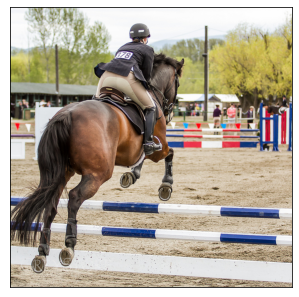


0: 640x640 6 persons, 1 horse, 1829.6ms
Speed: 5.0ms preprocess, 1829.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


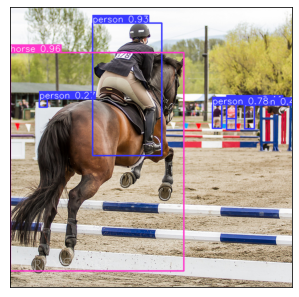

In [68]:
imgs = {}

dt_now = datetime.datetime.now().strftime('%Y%m%d-%H%M')
print(dt_now)
print(model.names)

sample_img_path = random.choice(list(Path("../../sample_data/coco_sample_datasets/sample_coco_train2017/").glob("*.jpg")))
img = cv2.imread(sample_img_path)[:,:,::-1]

print(sample_img_path)
show_img(img, dpi=70)

result = model(
                source    = img,
                conf      = 0.25,
                iou       = 0.7,
                save      = False,
                max_det   = 300,
                augment   = True,
                classes   = None, # [],

                name      = f"{dt_now}_run",
                project   = "./__output_yolov8__",
            )

res_img = result[0].plot()
show_img(res_img, dpi=70)